# Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 11: Data Cleaning - Level ⅠⅡ 
#### Exercises

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option("display.max_rows", 20, "display.max_columns", None)

# Exercise 1
In this exercise, we will be using 'Temperature_data.csv'. This dataset has some missing values. Do the following.

    a. After reading the file into a Pandas DataFrame, check if the dataset is level Ⅰ clean and if not clean it. Also, describe the cleanings if any.

In [3]:
day_df = pd.read_csv('Temperature_data.csv')
day_df

day_df[['ReadingDate', 'Time']] = day_df['ReadingDateTime'].str.split(' ', expand = True)
day_df[['Day', 'Month', 'Year']] = day_df['ReadingDate'].str.split('/', expand = True)
day_df['Month'] = day_df['Month'].apply(lambda x: int(x))
day_df.drop(['ReadingDateTime', 'ReadingDate', 'Year', 'Site', 'Species', 'Units', 'Provisional or Ratified'], axis = 1, inplace = True)
day_df.set_index(['Month', 'Day', 'Time'],inplace=True)

day_df

Value
Month Day Time        
1     1   0:00     9.0
      2   0:00     6.0
      3   0:00     5.0
      4   0:00     4.0
      5   0:00     5.0
...                ...
12    27  00:00    8.0
      28  00:00    9.0
      29  00:00    8.0
      30  00:00    7.0
      31  00:00    8.0

[365 rows x 1 columns]

The ReadingDateTime column was separated into four separate columns: Month, Day, Year, and ReadingTime.  Also re-indexed the data sets by month, day, and read time. Because all data were collected at the Celsius temperature of site R12 in 2019, the columns were removed because the year, site, species, units, and temporary or non-compliant columns were duplicated.

    b. Check if the dataset is level Ⅱ clean and if not clean it. Also, describe the cleanings if any.

In [4]:
vis_df = day_df.groupby('Month').mean()
vis_df

,Value
Month,
1,5.392857
2,7.785714
3,9.677419
4,11.333333
5,14.000000
6,17.481481
7,20.645161
8,19.516129
9,16.200000


Unpack, reconfigure, and reconfigure the table is the purpose of level 2. Since the data has already been decompressed and structured correctly, just need to reconstruct the data set for visualization. I did this looking for a monthly average temperature (Celcius).

    c.	The dataset has missing values. See how many, and run diagnosis to see what types of missing values they are. 

In [5]:
day_df_orig = pd.read_csv('Temperature_data.csv')
print('Number of missing values:')
for col in day_df_orig.columns:
    n_MV = sum(day_df_orig[col].isna())
    print('{}:{}'.format(col,n_MV))
    
print('\nNumber of missing values:')
for col in day_df.columns:
    n_MV = sum(day_df[col].isna())
    print('{}:{}'.format(col,n_MV))

Number of missing values:
Site:0
Species:0
ReadingDateTime:0
Value:14
Units:0
Provisional or Ratified:0

Number of missing values:
Value:14


The only column of interest was a column of values with data for temperature because all other columns were duplicated. The only column with missing values was a column of values with 14.

    d. Are there any outliers in the dataset?

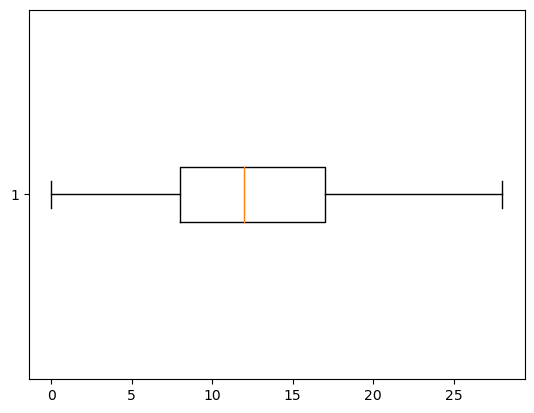

In [6]:
fig = plt.boxplot(day_df.Value.dropna(),vert = False)

    e.	How should we best deal with the missing values if our goal is to draw multiple boxplots that show the central tendency and variation of temperature across the months? Draw the described visualization after dealing with the missing values. 

If the goal is to show the trend and variation of the center of the monthly temperature, expect that excluding missing values should not have a significant impact on the trend and variation of the center. This means that the monthly temperature data should not change significantly from day to day, so considering that it is a possible option to exclude anomalies, found that there were no expected anomalies in this data.

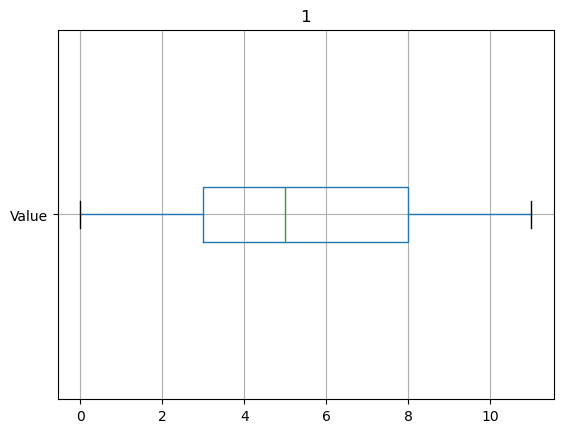

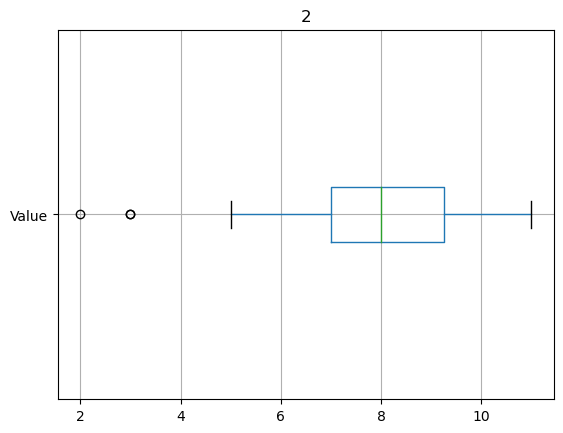

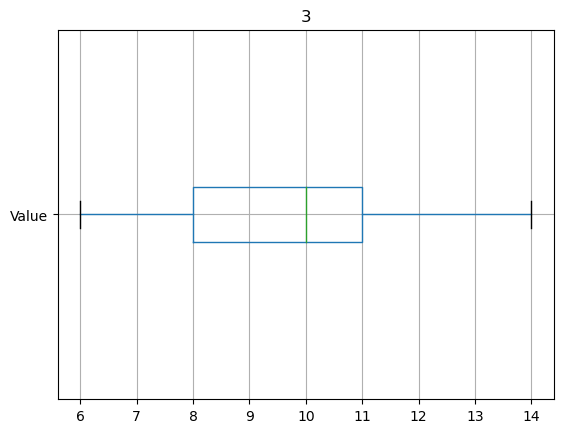

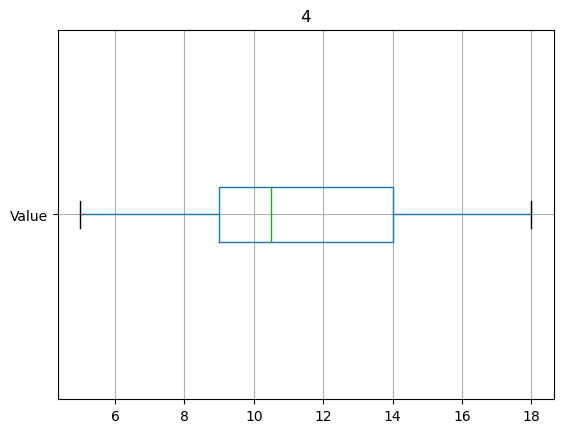

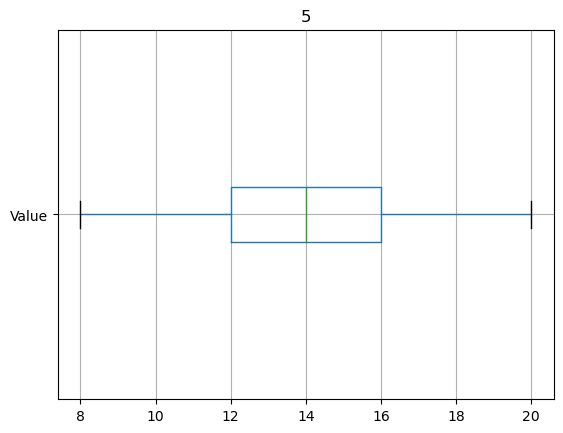

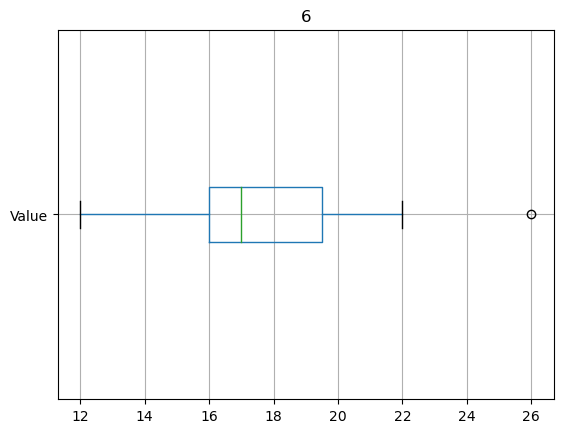

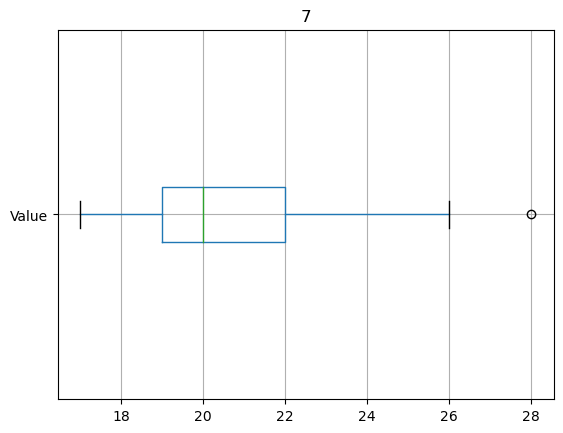

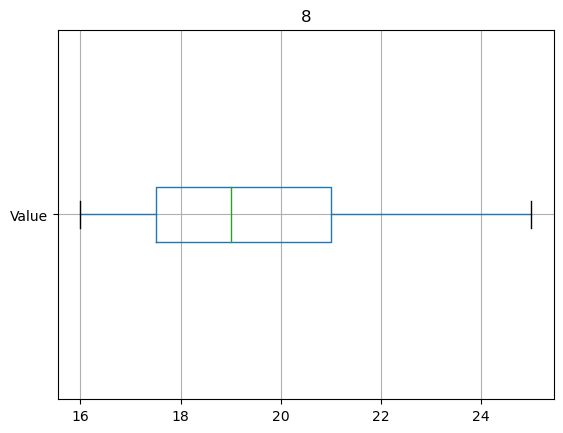

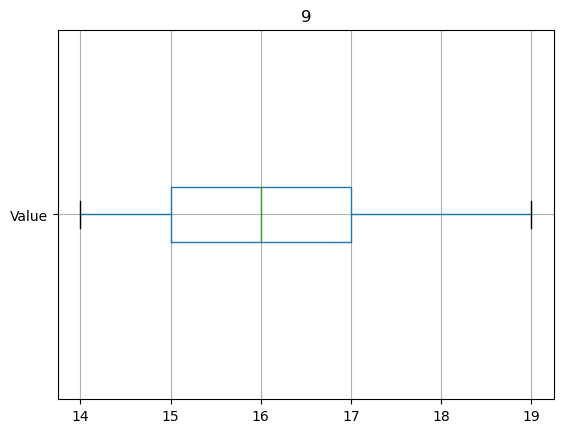

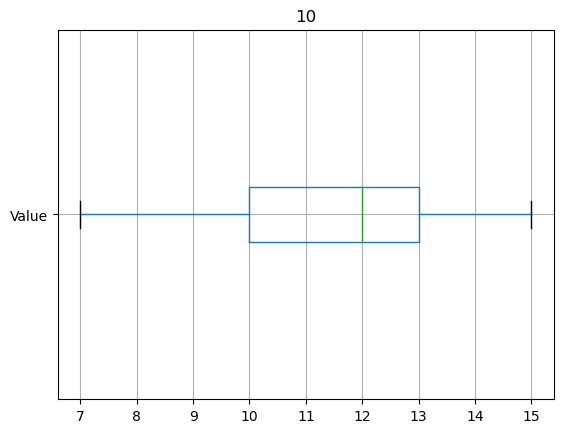

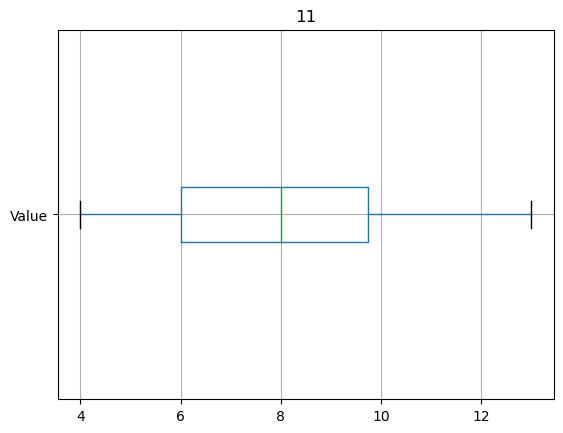

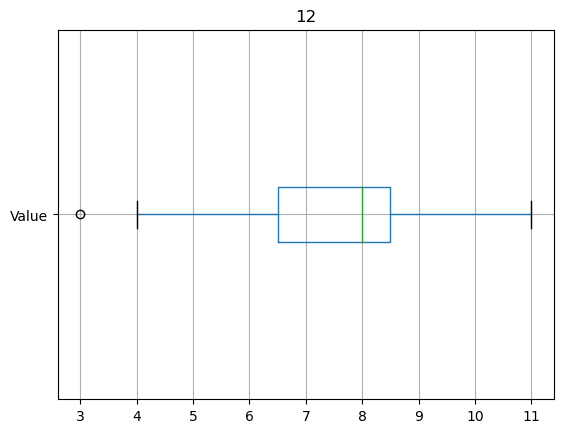

In [7]:
for month, group in day_df.dropna().groupby(level = 0):
    group.boxplot(column = 'Value', vert = False)
    plt.title(month)
    plt.show()

# Exercise 3
In this exercise, we will be using ‘imdb_top_1000.csv’. More information about this dataset maybe found on this link: https://www.kaggle.com/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows. Perform the following steps for this dataset. 

    a.	Read the file into movie_df, and list the level Ⅰ data cleaning steps that the dataset needs. Implement the listed items, if any. 

In [8]:
movie_df = pd.read_csv('imdb_top_1000.csv')
movie_df.head(1)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


In [10]:
movie_df['Runtime'] = movie_df['Runtime'].str.replace(' min', '')

movie_df = movie_df.rename(columns = {'Meta_score': 'Meta_Score',
                                      'No_of_Votes': 'Num_Votes'})
movie_df


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_Score,Director,Star1,Star2,Star3,Star4,Num_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


    b.	We want to employ a Decision Tree Classificaiton algorithm using the following columns to predict the IMDB_rating: Certificate, Runtime, Genre, and Gross. For this analytics goals, list the level 2 data cleanings that need to be done, and then implement them.  

In [11]:
from sklearn.preprocessing import LabelEncoder

movie_df = movie_df[['IMDB_Rating', 'Certificate', 'Runtime', 'Genre', 'Gross']]
movie_df['Certificate'] = pd.Categorical(movie_df['Certificate'])
movie_df['Certificate'] = movie_df['Certificate'].cat.codes
movie_df['Gross'] = movie_df['Gross'].str.replace(',', '')
movie_df['Gross'] = pd.to_numeric(movie_df['Gross'])
movie_df['Gross'] = movie_df['Gross'].fillna(movie_df['Gross'].mean())
le = LabelEncoder()
movie_df['Genre'] = le.fit_transform(movie_df['Genre'])
movie_df

C:\Users\sangh\AppData\Local\Temp\ipykernel_15400\3055317324.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['Certificate'] = pd.Categorical(movie_df['Certificate'])
C:\Users\sangh\AppData\Local\Temp\ipykernel_15400\3055317324.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['Certificate'] = movie_df['Certificate'].cat.codes
C:\Users\sangh\AppData\Local\Temp\ipykernel_15400\3055317324.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,IMDB_Rating,Certificate,Runtime,Genre,Gross
0,9.3,1,142,137,2.834147e+07
1,9.2,1,175,122,1.349664e+08
2,9.0,14,152,22,5.348584e+08
3,9.0,1,202,122,5.730000e+07
4,9.0,12,96,122,4.360000e+06
...,...,...,...,...,...
995,7.6,1,115,105,6.803475e+07
996,7.6,3,201,184,6.803475e+07
997,7.6,7,118,175,3.050000e+07
998,7.6,-1,97,182,6.803475e+07


    c.	Does the dataset have issues, regarding missing values? If yes, how best should we deal with them given the listed data analytic goals in b. 

In [13]:
print('\nmissing values number:')
for col in movie_df.columns:
    n_MV = sum(movie_df[col].isna())
    print('{}:{}'.format(col,n_MV))


missing values number:
IMDB_Rating:0
Certificate:0
Runtime:0
Genre:0
Gross:0


    d.	Use the following function from sklearn.tree to create a prediction model that can predict IMDB_rating using Certificate, Runtime, Genre and Gross: 
    
*DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0, min_samples_split=20, splitter='random')*

    The tuning parameters have been set for you so the DecsionTreeRegressor can perform better. Once the model is trained draw the trained tree and check if the attribute Gross is used for the prediction of IMDB_rating. 

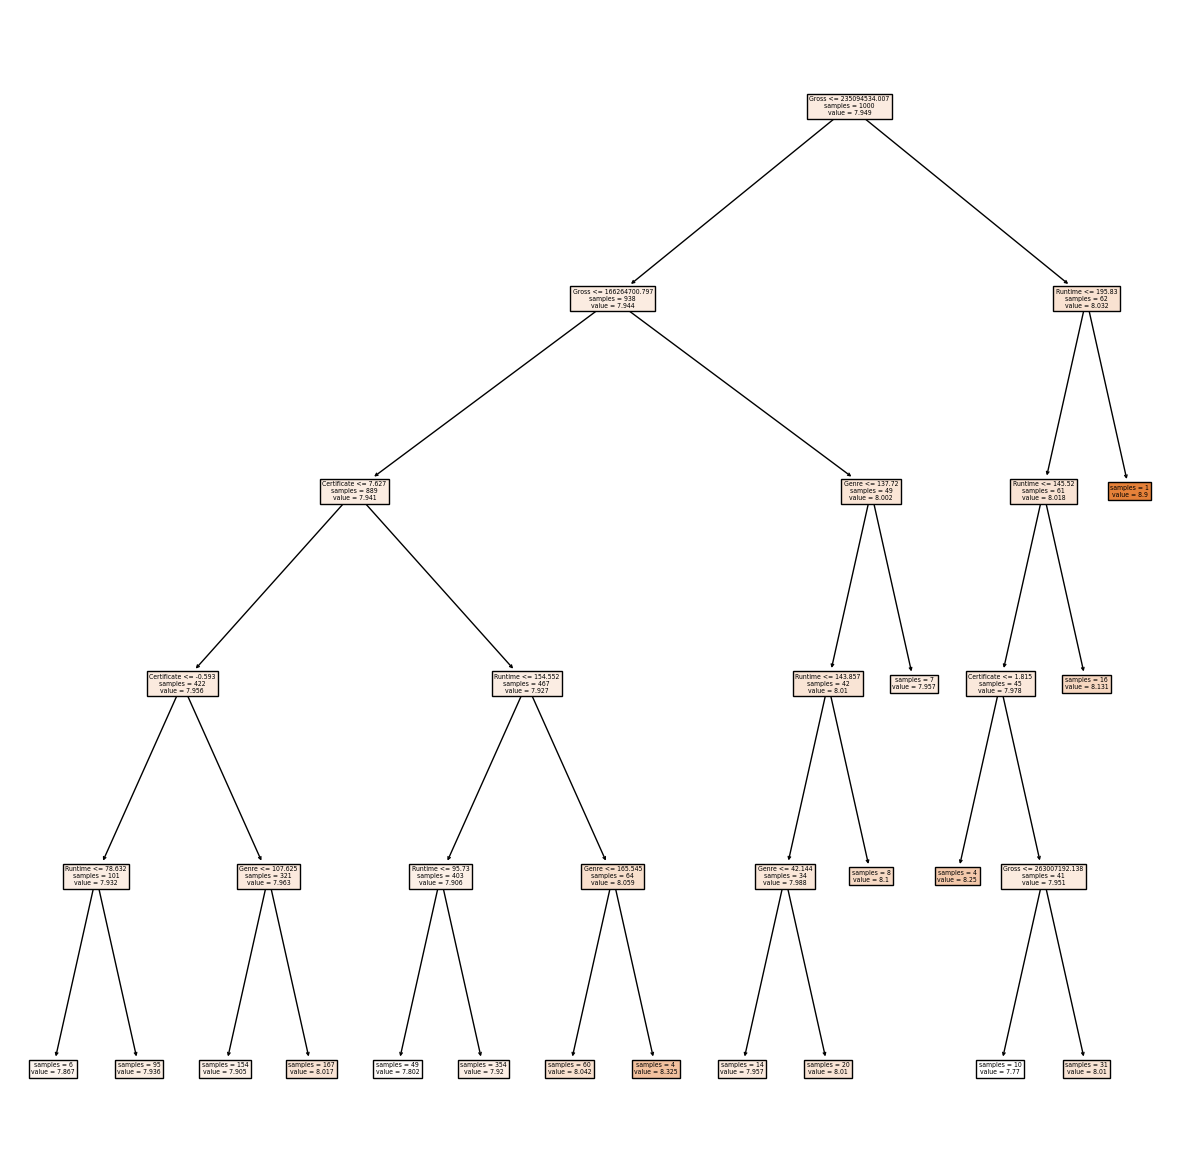

In [14]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

predictors = ['Certificate', 'Runtime', 'Genre', 'Gross']
target = 'IMDB_Rating'

Xs = movie_df[predictors]
y = movie_df[target]

classTree = DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0, min_samples_split=20, splitter='random')
classTree.fit(Xs, y)

plt.figure(figsize = (15,15))
plot_tree(classTree, 
          feature_names = predictors,  
          class_names = y.unique(),
          filled = True,
          impurity = False)
plt.show()

    e.	Run the following code and then explain what summary_df is.

`
dt_predicted_IMDB_rating = RegressTree.predict(Xs)
mean_predicted_IMDB_rating = np.ones(len(y))*y.mean()
summary_df = pd.DataFrame({'Prediction by Decision Tree': dt_predicted_IMDB_rating, 'Prediction by mean': mean_predicted_IMDB_rating, 'Actual IMDB_rating': y})
`

In [15]:
dt_predicted_IMDB_rating = classTree.predict(Xs)
mean_predicted_IMDB_rating = np.ones(len(y))*y.mean()
summary_df = pd.DataFrame({'Prediction by Decision Tree': dt_predicted_IMDB_rating, 'Prediction by mean': mean_predicted_IMDB_rating, 'Actual IMDB_rating': y})
summary_df

,Prediction by Decision Tree,Prediction by mean,Actual IMDB_rating
0,8.017365,7.9493,9.3
1,8.017365,7.9493,9.2
2,8.131250,7.9493,9.0
3,8.017365,7.9493,9.0
4,7.920339,7.9493,9.0
...,...,...,...
995,7.904545,7.9493,7.6
996,8.017365,7.9493,7.6
997,8.017365,7.9493,7.6
998,7.935789,7.9493,7.6


    f.	Run the following code and explain the visualizaiton it creates. What can you learn from the visualization? 

`summary_df['Decision Tree Error'] = abs(summary_df['Prediction by Decision Tree']- summary_df['Actual IMDB_rating'])
summary_df['Mean Error'] = abs(summary_df['Prediction by mean'] - summary_df['Actual IMDB_rating'])
plt.figure(figsize=(2,10))
table = summary_df[['Decision Tree Error','Mean Error']]
sns.heatmap(table, cmap='Greys')`

<AxesSubplot:>

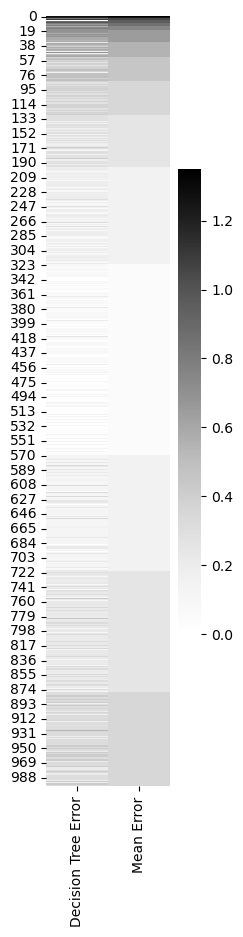

In [16]:
summary_df['Decision Tree Error'] = abs(summary_df['Prediction by Decision Tree']- summary_df['Actual IMDB_rating'])
summary_df['Mean Error'] = abs(summary_df['Prediction by mean'] - summary_df['Actual IMDB_rating'])
plt.figure(figsize=(2,10))
table = summary_df[['Decision Tree Error','Mean Error']]
sns.heatmap(table, cmap='Greys')

# Exercise 4
In this exercise, we will be using two CSV files: responses.csv and columns.csv. The two files are used to record the date of a survey conducted in Slovakia. To access the data on Kaggle.com use this link: https://www.kaggle.com/miroslavsabo/young-people-survey. Perform the following items for this data source. 

In [21]:
column_df = pd.read_csv('columns.csv')
column_df.head(2)

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs


In [22]:
response_df = pd.read_csv('responses.csv')
response_df.head(2)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats


    a.	Are there respondents in this survey that are suspected to be outliers based on their age? How many? list them in a separate data frame.

(array([27., 27., 28., 29., 29., 27., 30., 27., 27., 29., 30., 27., 28.,
        28., 29., 29., 30., 28., 28., 28., 28., 29., 27., 28., 28., 27.,
        29., 28., 27., 28., 28., 28., 30., 28., 29., 29., 30., 27., 30.,
        27., 29., 30., 30., 27., 28., 28., 27., 30., 29., 30., 28., 27.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.]))

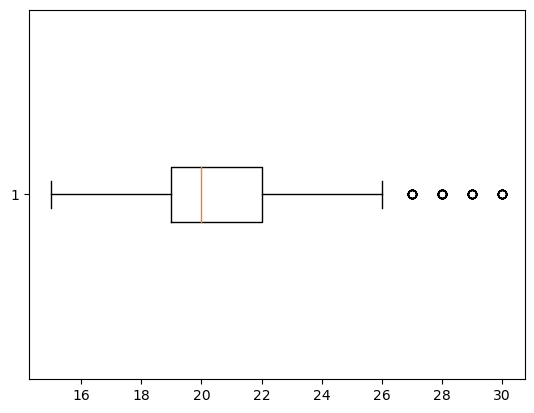

In [23]:
fig = plt.boxplot(response_df.Age.dropna(), vert = False)
response_df[response_df.Age > 26]
fig['fliers'][0].get_data()

In [24]:
Q1 = response_df.Age.quantile(0.25)
Q3 = response_df.Age.quantile(0.75)
IQR = Q3-Q1

BM = (response_df.Age > (Q3+1.5 *IQR)) | (response_df.Age < (Q1-1.5 *IQR))
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
33,5.0,4.0,2.0,2.0,3.0,4.0,5.0,4.0,3.0,1.0,1.0,1.0,3.0,4.0,4.0,3.0,2.0,1.0,5.0,4.0,3.0,4.0,4.0,3.0,1.0,3.0,5.0,4.0,5.0,2.0,3.0,5.0,3.0,5.0,2.0,1.0,5.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0,4.0,1.0,5.0,1.0,5.0,3.0,3.0,1.0,5.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,1.0,5.0,2.0,4.0,4.0,5,3.0,1.0,2.0,4.0,tried smoking,social drinker,4.0,5.0,2.0,2.0,3.0,1.0,1.0,5.0,5.0,2.0,4.0,4.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,4.0,2,3.0,4.0,5.0,3.0,4.0,2.0,1.0,1.0,4,4.0,4,i am often early,sometimes,3.0,5.0,3.0,3.0,3.0,5.0,1.0,4.0,5.0,2.0,5.0,4.0,5.0,4.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,2.0,few hours a day,2.0,2.0,2.0,1.0,1.0,2,4.0,27.0,170.0,70.0,1.0,female,right handed,masters degree,no,city,block of flats
45,5.0,4.0,5.0,2.0,2.0,4.0,3.0,5.0,4.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0,4.0,3.0,4.0,5.0,5.0,4.0,5.0,2.0,4.0,1.0,2.0,1.0,5.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,3.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,2.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,5.0,2.0,5.0,1.0,4.0,5.0,2.0,2.0,5.0,5.0,4,1.0,5.0,4.0,4.0,never smoked,social drinker,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,1.0,5.0,5.0,5.0,1.0,4,1.0,5.0,NaN,4.0,1.0,5.0,5.0,3.0,2,2.0,2,i am often early,never,2.0,5.0,2.0,5.0,5.0,4.0,5.0,4.0,4.0,3.0,4.0,5.0,5.0,2.0,4.0,2.0,1.0,2.0,5.0,1.0,5.0,1.0,3.0,most of the day,4.0,5.0,4.0,4.0,5.0,4,5.0,27.0,181.0,78.0,1.0,male,right handed,masters degree,no,NaN,block of flats
72,5.0,3.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,2.0,4.0,4.0,2.0,2.0,3.0,3.0,5.0,1.0,1.0,5.0,4.0,5.0,5.0,5.0,3.0,3.0,5.0,5.0,4.0,2.0,5.0,3.0,2.0,1.0,1.0,1.0,4.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,3.0,1.0,2.0,5.0,3.0,3.0,1.0,4.0,3.0,2.0,2.0,3.0,1.0,2.0,5.0,4.0,2.0,1.0,3.0,3.0,3.0,5.0,5,4.0,3.0,4.0,4.0,former smoker,social drinker,4.0,2.0,NaN,4.0,2.0,3.0,3.0,4.0,3.0,1.0,5.0,4.0,4.0,4.0,4.0,2.0,2.0,3.0,1.0,5.0,2,3.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,3,2.0,5,i am always on time,everytime it suits me,2.0,3.0,3.0,4.0,4.0,3.0,3.0,5.0,3.0,4.0,3.0,5.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,2.0,3.0,3.0,1.0,few hours a day,3.0,2.0,2.0,2.0,2.0,2,3.0,28.0,168.0,52.0,1.0,female,right handed,secondary school,no,city,block of flats
186,4.0,2.0,2.0,4.0,2.0,3.0,3.0,4.0,2.0,1.0,1.0,1.0,1.0

In [25]:
print(len(response_df[BM]), 'outliers')

52 outliers


    b.	Are there respondents in this survey that are suspected to be outliers based on their level of liking for Country and Hardrock music? How many? list them in a separate data frame.

<AxesSubplot:xlabel='Country', ylabel='Metal or Hardrock'>

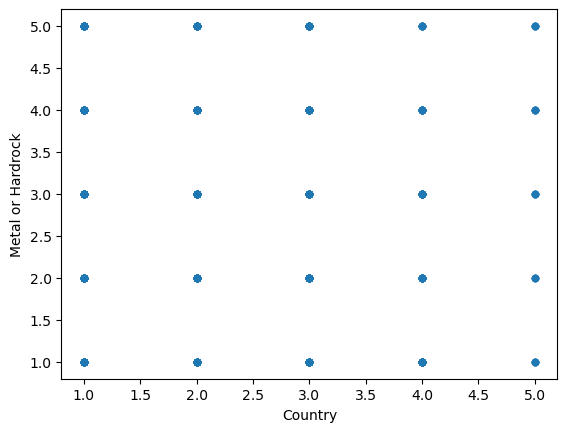

In [27]:
response_df.plot.scatter(x = 'Country', y = 'Metal or Hardrock')

	c. Are there respondents in this survey that are suspected to be outliers based on their BMI or Education level? How many? list them in a separate data frame. BMI can be calculated using the following formula. 
    
`BMI=Weight/Height^2`

    The Weight has to be in kilograms and height in meters for the following formula. In the dataset, Weight is recorded in kilograms but Height is recorded in centimeters and has to be transformed to Meter.


<AxesSubplot:xlabel='BMI', ylabel='Education'>

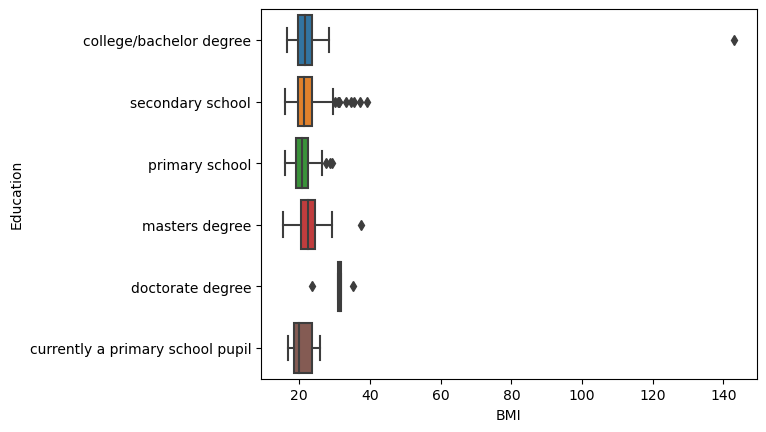

In [28]:
response_df['BMI'] = response_df['Weight'] / ((response_df['Height'] / 100) ** 2)
sns.boxplot(x = response_df.BMI, y = response_df.Education)

In [29]:
BM1 = (response_df.Education == 'college/bachelor degree') & (response_df.BMI > 30)
BM2 = (response_df.Education == 'secondary school') & ((response_df.BMI > 30))
BM3 = (response_df.Education == 'primary school') & ((response_df.BMI > 30))
BM4 = (response_df.Education == 'masters school') & ((response_df.BMI > 30))
BM5 = (response_df.Education == 'doctorate school') & ((response_df.BMI > 30) | (response_df.BMI < 30))
BM = BM1 | BM2 | BM3 | BM4 | BM5
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,BMI
42,5.0,5.0,2.0,2.0,2.0,3.0,4.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,1.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,5.0,4.0,3.0,5.0,2.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,2.0,3.0,2.0,5.0,4.0,3.0,3.0,2.0,2.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0,4.0,4.0,2.0,5.0,3.0,5.0,1.0,1.0,3.0,1.0,5.0,1,1.0,1.0,3.0,5.0,never smoked,never,3.0,3.0,4.0,2.0,3.0,5.0,3.0,5.0,5.0,3.0,5.0,4.0,1.0,1.0,2.0,1.0,3.0,3.0,1.0,5.0,2,4.0,5.0,5.0,3.0,1.0,2.0,2.0,4.0,4,3.0,3,i am often early,sometimes,5.0,4.0,1.0,3.0,2.0,2.0,1.0,3.0,2.0,2.0,4.0,4.0,4.0,2.0,4.0,3.0,1.0,4.0,5.0,3.0,4.0,2.0,2.0,few hours a day,5.0,4.0,1.0,2.0,2.0,4,3.0,19.0,170.0,90.0,0.0,female,right handed,secondary school,yes,city,block of flats,31.141869
151,5.0,4.0,3.0,1.0,1.0,3.0,2.0,2.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,1.0,5.0,4.0,4.0,5.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,4.0,4.0,4.0,4.0,2.0,2.0,3.0,3.0,1.0,2.0,1.0,3.0,4.0,2.0,3.0,2.0,2.0,3.0,4.0,2.0,1.0,1.0,1.0,4.0,5.0,1.0,4.0,2.0,3.0,4.0,5.0,2.0,3.0,3.0,2.0,1.0,4.0,3.0,3,4.0,2.0,2.0,4.0,tried smoking,never,1.0,5.0,1.0,4.0,4.0,4.0,1.0,5.0,4.0,3.0,3.0,4.0,3.0,1.0,3.0,5.0,5.0,4.0,1.0,4.0,3,2.0,4.0,5.0,3.0,5.0,4.0,3.0,2.0,4,1.0,3,i am often early,everytime it suits me,1.0,4.0,4.0,4.0,2.0,4.0,4.0,2.0,2.0,2.0,3.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,1.0,1.0,3.0,3.0,2.0,few hours a day,4.0,1.0,4.0,4.0,3.0,3,2.0,20.0,180.0,100.0,1.0,male,right handed,secondary school,no,city,block of flats,30.864198
292,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,2.0,1.0,5.0,2.0,4.0,5.0,5.0,3.0,2.0,5.0,5.0,3.0,2.0,5.0,3.0,4.0,3.0,1.0,1.0,5.0,2.0,2.0,1.0,1.0,5.0,4.0,5.0,1.0,2.0,1.0,3.0,1.0,2.0,3.0,1.0,4.0,1.0,2.0,1.0,5.0,5.0,4.0,5.0,5.0,3.0,5.0,2.0,2.0,1.0,1.0,4.0,4,4.0,4.0,4.0,1.0,never smoked,social drinker,3.0,3.0,4.0,5.0,4.0,4.0,3.0,5.0,5.0,1.0,2.0,4.0,2.0,1.0,5.0,5.0,3.0,4.0,1.0,5.0,1,3.0,4.0,5.0,3.0,2.0,3.0,2.0,5.0,4,2.0,5,i am often early,sometimes,2.0,4.0,2.0,4.0,5.0,4.0,3.0,5.0,4.0,4.0,5.0,2.0,5.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,5.0,4.0,4.0,few hours a day,4.0,4.0,3.0,3.0,5.0,5,4.0,21.0,184.0,120.0,1.0,female,right handed,secondary school,no,city,house/bungalow,35.444234
401,5.0,3.0,2.0,1.0,3.0,1.0,3

In [30]:
print(len(response_df[BM]), 'outliers')

9 outliers


    d.	Are there respondents in this survey that are suspected to be outliers based on their BMI and Age? How many? list them in a separate data frame.

<AxesSubplot:xlabel='BMI', ylabel='Age'>

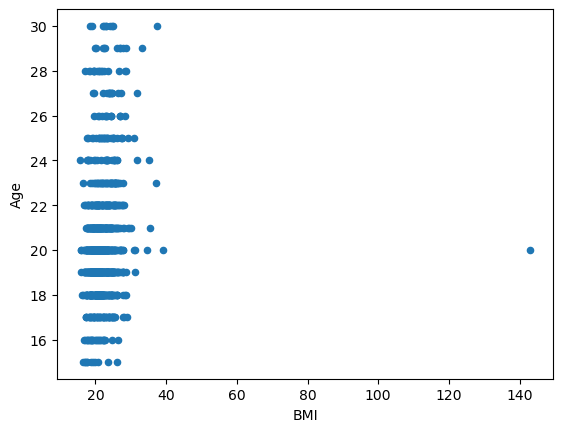

In [31]:
response_df.plot.scatter(x = 'BMI', y = 'Age')

In [32]:
BM = (response_df.BMI > 50)
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,BMI
676,5.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,5.0,2.0,2.0,2.0,5.0,1.0,2.0,2.0,3.0,1.0,2.0,3.0,4.0,5.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,5.0,2.0,3.0,1.0,4.0,1.0,1.0,1.0,5.0,5.0,2.0,4.0,3.0,3.0,5.0,5.0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,3,4.0,3.0,3.0,3.0,current smoker,drink a lot,4.0,2.0,1.0,2.0,1.0,2.0,3.0,3.0,3.0,4.0,4.0,2.0,2.0,5.0,2.0,1.0,2.0,4.0,2.0,4.0,1,2.0,1.0,2.0,2.0,NaN,3.0,4.0,4.0,3,2.0,3,i am often early,everytime it suits me,3.0,3.0,5.0,3.0,3.0,3.0,4.0,4.0,1.0,2.0,4.0,2.0,3.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,3.0,1.0,few hours a day,3.0,4.0,2.0,2.0,4.0,2,4.0,20.0,62.0,55.0,2.0,female,right handed,college/bachelor degree,no,city,house/bungalow,143.080125


In [33]:
print(len(response_df[BM]), 'outliers')

1 outliers


    e.	Are there respondents in this survey that are suspected to be outliers based on their BMI and Gender? How many? list them in a separate data frame.

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,BMI
22,5.0,3.0,3.0,2.0,3.0,3.0,3.0,4.0,NaN,1.0,2.0,2.0,1.0,1.0,3.0,2.0,3.0,3.0,2.0,5.0,2.0,3.0,5.0,4.0,4.0,2.0,4.0,5.0,5.0,3.0,3.0,3.0,4.0,2.0,1.0,1.0,NaN,3.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,2.0,2.0,1.0,4.0,4.0,3.0,2.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,2.0,5.0,2.0,5.0,1.0,2.0,1.0,1.0,5.0,5,3.0,1.0,3.0,3.0,tried smoking,social drinker,3.0,2.0,3.0,1.0,2.0,3.0,5.0,4.0,3.0,1.0,3.0,3.0,3.0,1.0,5.0,5.0,1.0,3.0,2.0,4.0,3,3.0,5.0,4.0,3.0,3.0,3.0,3.0,5.0,3,2.0,2,i am often early,sometimes,4.0,3.0,3.0,3.0,3.0,2.0,4.0,5.0,3.0,1.0,2.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,2.0,4.0,3.0,3.0,2.0,few hours a day,5.0,2.0,1.0,2.0,2.0,4,4.0,22.0,167.0,70.0,1.0,female,right handed,college/bachelor degree,no,city,house/bungalow,25.099502
31,4.0,3.0,4.0,1.0,3.0,2.0,3.0,5.0,3.0,1.0,1.0,3.0,3.0,2.0,1.0,1.0,5.0,1.0,2.0,4.0,1.0,1.0,5.0,5.0,2.0,2.0,5.0,5.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,5.0,5.0,4.0,1.0,1.0,3.0,4.0,1.0,5.0,4.0,1.0,2.0,3.0,1.0,3.0,1.0,2.0,1.0,3.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,5,3.0,1.0,3.0,2.0,tried smoking,social drinker,3.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,5.0,2.0,3.0,1.0,2.0,1.0,4.0,4.0,2.0,3.0,1.0,5.0,2,3.0,4.0,5.0,2.0,3.0,2.0,3.0,5.0,3,2.0,3,i am always on time,sometimes,3.0,3.0,4.0,3.0,3.0,2.0,1.0,4.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,less than an hour a day,4.0,3.0,3.0,2.0,2.0,2,2.0,22.0,177.0,80.0,1.0,female,right handed,secondary school,no,city,block of flats,25.535446
42,5.0,5.0,2.0,2.0,2.0,3.0,4.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,1.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,5.0,4.0,3.0,5.0,2.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,2.0,3.0,2.0,5.0,4.0,3.0,3.0,2.0,2.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0,4.0,4.0,2.0,5.0,3.0,5.0,1.0,1.0,3.0,1.0,5.0,1,1.0,1.0,3.0,5.0,never smoked,never,3.0,3.0,4.0,2.0,3.0,5.0,3.0,5.0,5.0,3.0,5.0,4.0,1.0,1.0,2.0,1.0,3.0,3.0,1.0,5.0,2,4.0,5.0,5.0,3.0,1.0,2.0,2.0,4.0,4,3.0,3,i am often early,sometimes,5.0,4.0,1.0,3.0,2.0,2.0,1.0,3.0,2.0,2.0,4.0,4.0,4.0,2.0,4.0,3.0,1.0,4.0,5.0,3.0,4.0,2.0,2.0,few hours a day,5.0,4.0,1.0,2.0,2.0,4,3.0,19.0,170.0,90.0,0.0,female,right handed,secondary school,yes,city,block of flats,31.141869
78,4.0,4.0,4.0,

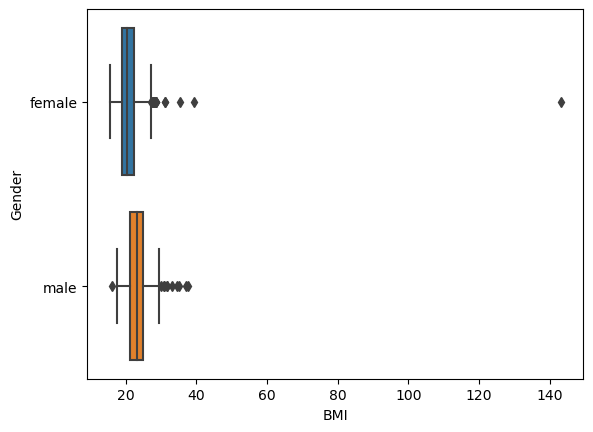

In [34]:
sns.boxplot(x = response_df.BMI, y = response_df.Gender)
BM1 = (response_df.Gender == 'female') & (response_df.BMI > 25)
BM2 = (response_df.Gender == 'male') & ((response_df.BMI > 30) | (response_df.BMI < 18))
BM = BM1 | BM2
response_df[BM]

In [35]:
print(len(response_df[BM]), 'outliers')

61 outliers
